# Statistic Study

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\likoh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
import sklearn.cluster

In [5]:
def otsu_threshold(y, bins=256):
    y = np.clip(y, 0, 1)
    hist, bin_edges = np.histogram(y, bins=bins, range=(0,1))
    p = hist.astype(float) / hist.sum()
    omega = np.cumsum(p)
    mu = np.cumsum(p * (bin_edges[:-1] + bin_edges[1:]) / 2.0)
    mu_t = mu[-1]
    sigma_b2 = (mu_t*omega - mu)**2 / (omega*(1 - omega) + 1e-12)
    idx = np.nanargmax(sigma_b2)
    return (bin_edges[idx] + bin_edges[idx+1]) / 2.0

def baseline_otsu_quantile(y, q=0.10):
    t_otsu = otsu_threshold(y)
    signal = y[y >= t_otsu]
    if len(signal) < 5: 
        return t_otsu
    return float(np.quantile(signal, q))  

In [10]:
a = np.random.randint(0, 10, 100)

In [18]:
s = int(input())
e = int(input())
c = int(input())
a = np.append(a, np.random.randint(s,e,c))

0
10
600


In [19]:
a = a/100

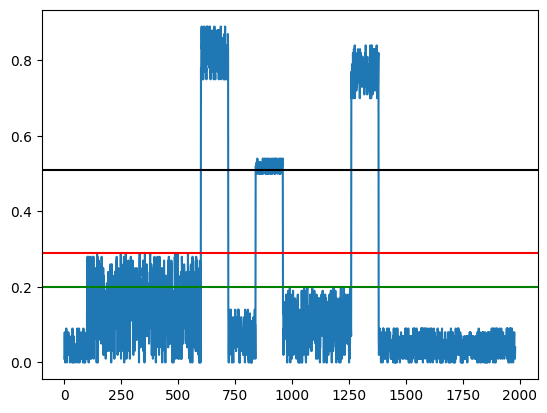

In [20]:
plt.plot(a)
plt.axhline(otsu_threshold(a), color='red')
plt.axhline(np.mean(a), color='green')
plt.axhline(baseline_otsu_quantile(a), color='black')